<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson6/seminar6-povtorenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Семинар 6
### **Решающие деревья и лес: повторение**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
import scipy.stats
from tqdm import tqdm_notebook
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

sns.set(context='poster')
%matplotlib inline

### Задача 1:

Скачайте датасет про классификацию женщин с диабетом. Разделите на трейн и тест.

In [5]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [6]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [8]:
X = data['data']
y = data['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

Обучите обычное решающее дерево глубины 3. Выведите его графическое представление, а также accuracy на тренировочной и тестовой выборке.

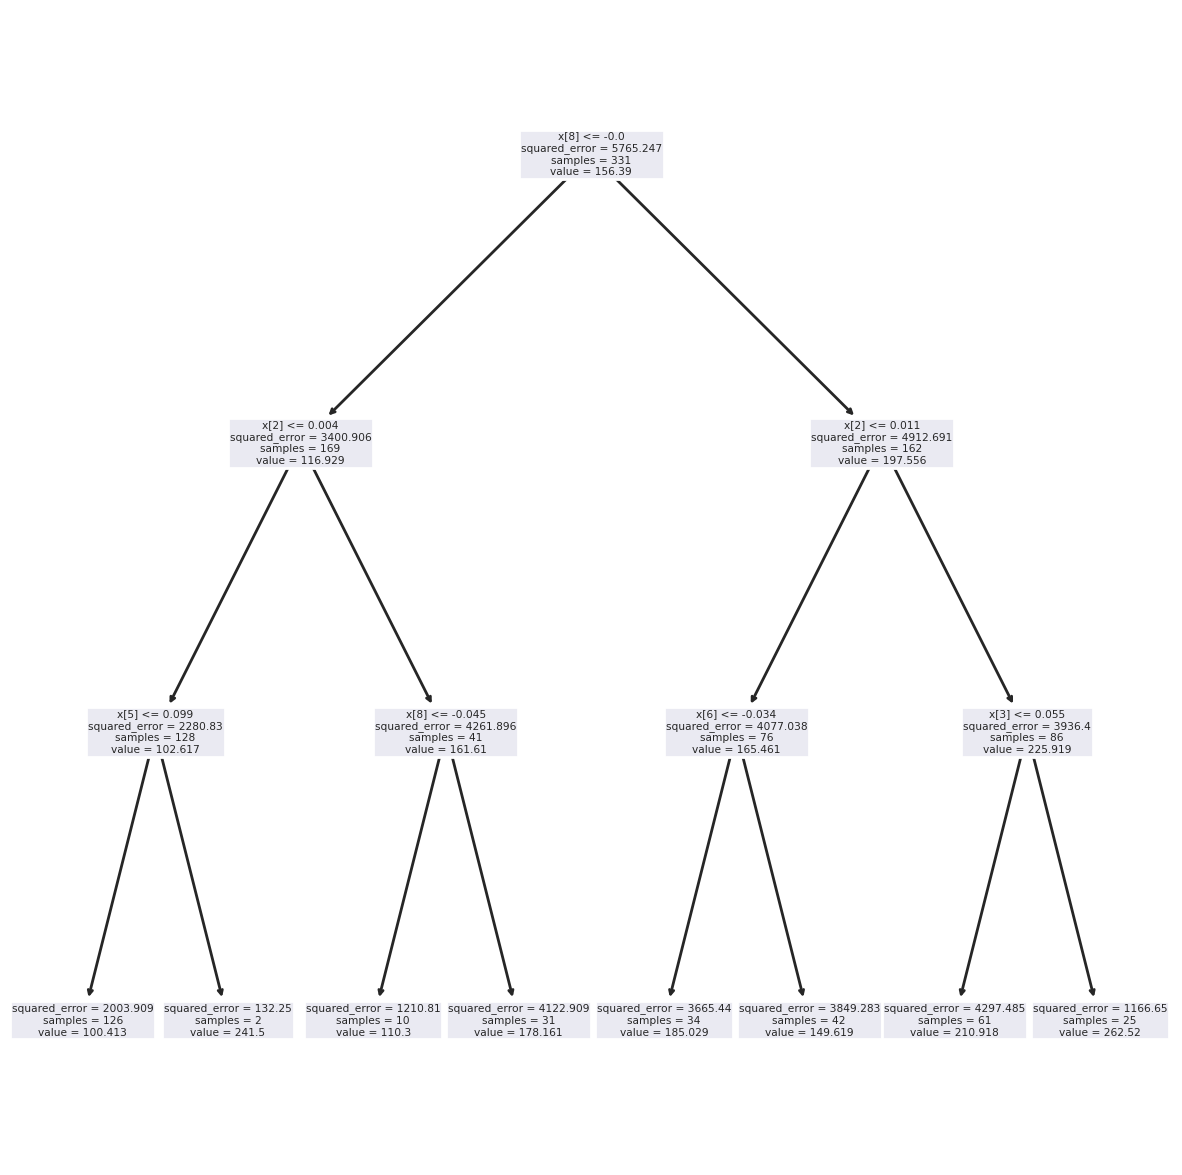

In [16]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

tr = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)


Посчитайте accuracy

In [18]:
tr.score(X_train,y_train), tr.score(X_test,y_test)

(0.4915449856433629, 0.40025489695432337)

Визуализируйте дерево

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(tr)
pass

Теперь обучите случайный лес с 100 деревьями.

In [19]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 100

rf = RandomForestRegressor(n_estimators=n_estimators).fit(X_train,y_train)

Выведите параметры леса.

In [20]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [21]:
tr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Какие параметры уже известны и относятся к решающему дереву?

**Ответ:**
- `ccp_alpha` - регуляризация на глубину дерева
- `max_depth` - глубина дерева
- `max_leaf_nodes` - максимальное число листьев
- `min_samples_leaf` - минимальное число сэмплов, которое можно оставить в листе дерева
- `min_weight_fraction_leaf` - тоже самое для случая взвешенной выборки. По умолчанию веса всех сэмплов - 1
- `min_samples_split` - минимальное число сэмплов, чтобы выполнить сплит
- `max_features` - число при рассмотрении для подбора сплита (1 - рассматриваются все фичи)
- `min_impurity_decrease` - задает необходимое изменение коэффициента джини для сплита
- `min_weight_fraction_leaf`-



Появляются новые важные гиперпараметры: n_estimators (количество деревьев в лесу). Также важным является гиперапараметр max_features &mdash; максимальное количество признаков, которые могут быть перебраны при разбиении вершины дерева. Перед каждым разбиением дерева генерируется выборка из `min(k, max_features)` случайных признаков (`k` — количество признаков в датасете) и только эти признаки рассматриваются как разделяющие в данной вершине.

Выведите качество, сравните с деревом.

In [22]:
rf.score(X_train,y_train), rf.score(X_test,y_test)

(0.9087230756039232, 0.554065808523712)

**Вывод:** Случайные лес значительно переобучился. Тем не менее качество на тесте лучше чем у дерева

Нарисуйте первые 6 деревьев леса.

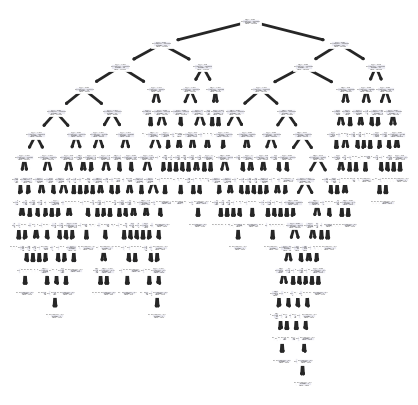

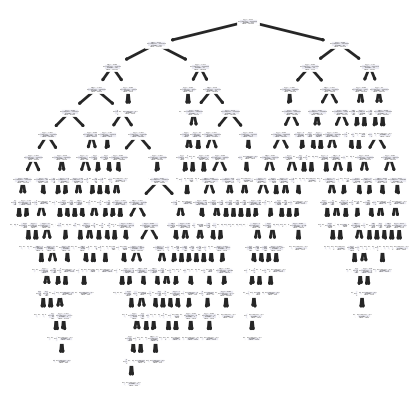

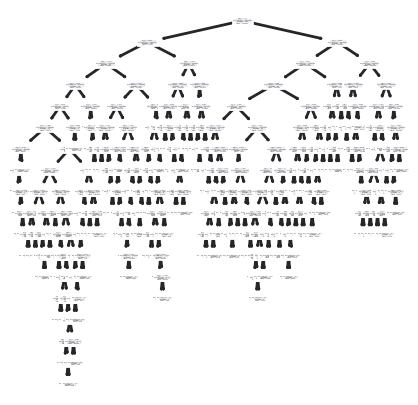

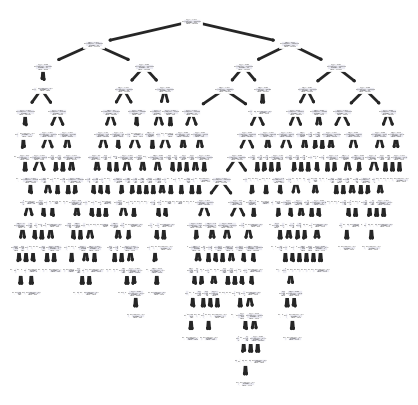

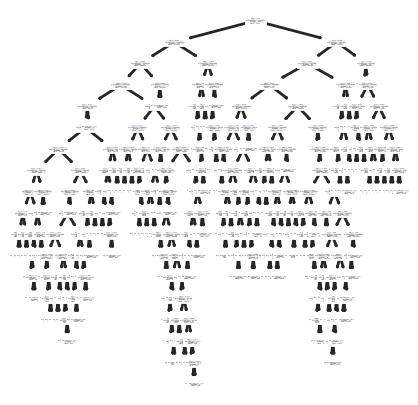

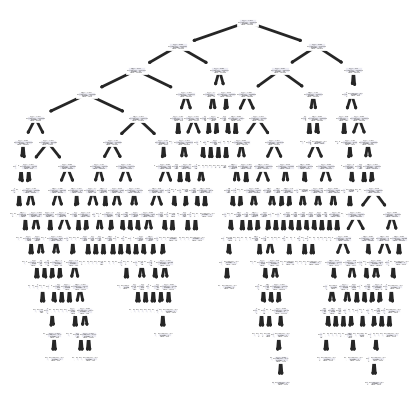

In [27]:
for tree in rf.estimators_[:6]:
    plt.figure(figsize=(5,5))
    plot_tree(tree)
    plt.show()

Как выглядят деревья в решающем дереве? Насколько они отличаются от обученного ранее дерева и друг от друга?

**Вывод:** деревья значительно отличаются при стандартных настрйоках. Они значительно глубже и их рост неравномерен по узлам.